In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy 
import math 
import scipy 
import healpy as hp
%matplotlib inline

In [2]:
from pylab import imshow
from numpy import random
from PIL import Image
from numpy.linalg import inv
from __future__ import division
from matplotlib import gridspec
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from astropy.io import fits
from astropy.visualization import astropy_mpl_style #color 
plt.style.use(astropy_mpl_style)

In [3]:
file='/Users/marxena/Desktop/hit.fits'

#hdul=fits.open(file)


In [4]:
#data = hdul[0].data

#data.dtype.name

#with fits.open(file) as hdul:
 #   data = hdul[0].data
    
#x=data[1, 4]
#x=data[247:267:365:385]

#print(x)

#print(data[204:234,395:425])

x=fits.open(file)
x.info()

#d[204:234, 395:425]

Filename: /Users/marxena/Desktop/hit.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   (968, 600, 3)   uint8   


In [8]:
hdu=x[1]
hdu.header

IndexError: list index out of range

In [9]:
image_data = fits.getdata(file) #, ext=0)
print(image_data.shape)

(3, 600, 968)


In [10]:
array=hdu.data
print(array)

NameError: name 'hdu' is not defined

In [11]:
print(array[1]) #205:235]

NameError: name 'array' is not defined

In [12]:
new=array.reshape(3*27,36)
print(new)

NameError: name 'array' is not defined

In [13]:
new[7:27,5:25]

NameError: name 'new' is not defined

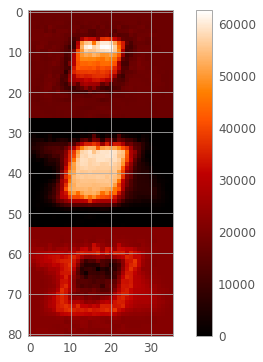

In [168]:
plt.imshow(new)
plt.colorbar()

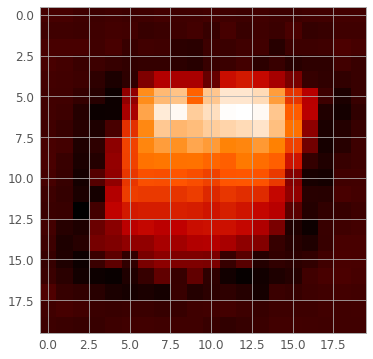

In [169]:
plt.imshow(new[3:23,7:27])

In [170]:
#new[3:23,7:27]

In [171]:
projected = np.sum(array, axis=0)

In [172]:
np.shape(array)

(3, 27, 36)

In [1]:
shape=np.shape(projected)
print(shape)

NameError: name 'np' is not defined

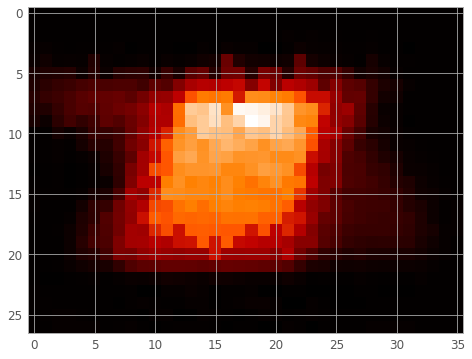

In [219]:
imshow(projected)

In [175]:
def WhiteNoiseMap(x_dim,y_dim):
  #  x_dim=
   # y_dim=20 #dimensions
    ANoise=1
    Sense=0.3#multiplier 
    WhiteNoise=np.random.randn(x_dim,y_dim)*ANoise
    WNmean=np.mean(WhiteNoise)
    return(WhiteNoise)

In [176]:
Noise=WhiteNoiseMap(shape[0],shape[1])

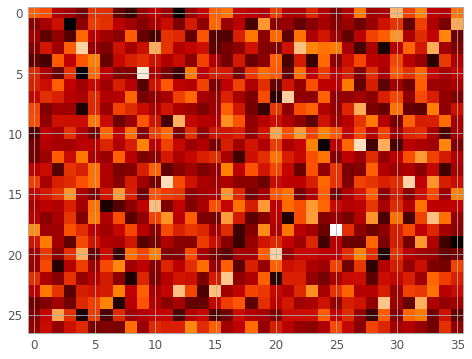

In [177]:
imshow(Noise)

In [181]:
def Noisemap():
    global W,H
    W=WhiteNoiseMap(shape[0],shape[1]) 
    H=projected#()
    N=W/H
    return(N)

In [182]:
def Noisemap1(hitmap, whitenoise):
    global W,H
    shape = np.shape(hitmap)
    xs= shape[0]
    ys =shape[1]
    W=WhiteNoiseMap(xs, ys) 
    N= whitenoise/ hitmap
    return N

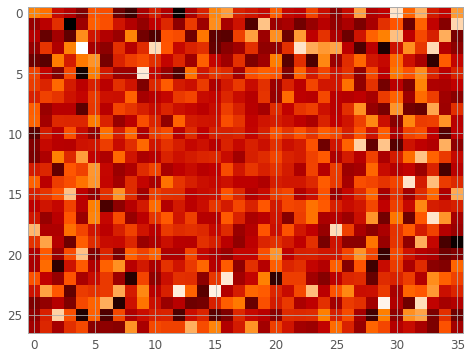

In [186]:
c=Noisemap1(projected,Noise)
imshow(c)

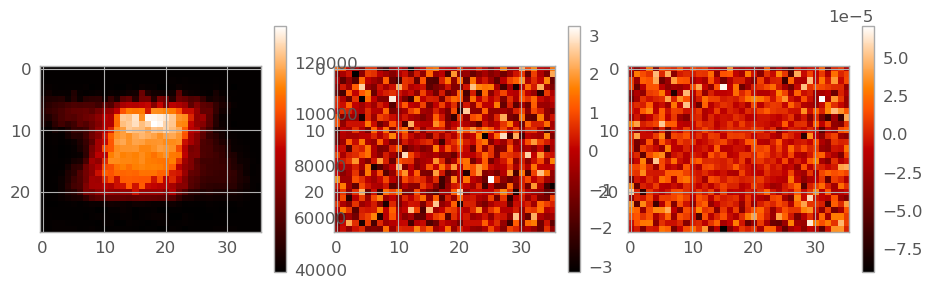

In [180]:
fig, axx = plt.subplots(figsize=(9,9), dpi=100, nrows=1, ncols=3) #the ordering
axx[0].imshow(projected)#,cmap='afmhot')
axx[1].imshow(Noise)#,cmap='afmhot')
axx[2].imshow(Noisemap())#,cmap='afmhot')

plt.tight_layout()

plt.colorbar(imshow(projected),ax=axx[0],fraction=0.05)
plt.colorbar(imshow(Noise),ax=axx[1],fraction=0.05)
plt.colorbar(imshow(Noisemap()),ax=axx[2],fraction=0.05)

#plt.savefig('MyToastHits.png',bbox_inches='tight')
plt.show()

In [195]:
def driver_make_noisemap(file_hitmap, parameters_noise):
    # read heat map
    f=np.load(file_hitmap)
    noise= noise_function (parameters_noise)
    shape(f)

    return W/H


def plot_figure(projected, noise, noisemap, figname="MyToastHits.png"):
    fig, axx = plt.subplots(figsize=(9,9), dpi=100, nrows=1, ncols=3) #the ordering
    s=axx[0].imshow(projected)#,cmap='afmhot')
    axx[1].imshow(noise)#,cmap='afmhot')
    axx[2].imshow(noisemap)#,cmap='afmhot')

    #plt.tight_layout()

    plt.colorbar(imshow(projected),ax=axx[0],fraction=0.05)
    plt.colorbar(imshow(noise),ax=axx[1], fraction=0.05)
    plt.colorbar(imshow(noisemap,ax=axx[2], fraction=0.05))
    
    if figname: 
                 plt.savefig(figname,bbox_inches='tight')
    else:
                 plt.savefig("myfigure.png",bbox_inches='tight')
    plt.show()

TypeError: inner() got multiple values for argument 'ax'

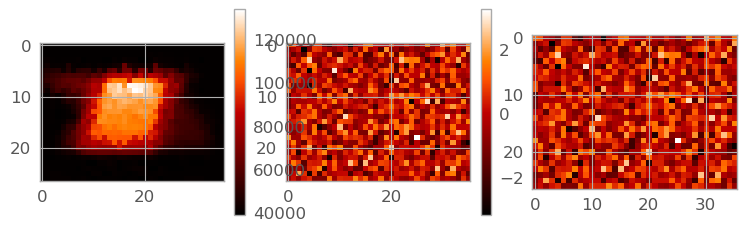

In [196]:
for i in range(1000):
    plot_figure(projected[i], Noise[i], c[i])